In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyfonts import load_font
from drawarrow import ax_arrow
from highlight_text import fig_text, ax_text

df = pd.read_csv('japan-population.csv')
def date_to_year(s):
   return s[:4]
df['date'] = df['date'].apply(date_to_year).astype(int)
df = df[(df['date'] > 1950) & (df['date'] < 2025)]
df.drop(columns=[' Annual Growth Rate'], inplace=True)
df = df.diff()
df.columns = ['date', 'pop_var']
df['date'] = range(1951, 2025)
df = df[(df['date'] > 1951)]
df['flag'] = (df['pop_var'] < 0).cumsum().eq(1).astype(bool)
df

,date,pop_var,flag
2,1952,1238290.0,False
3,1953,1135376.0,False
4,1954,1035879.0,False
5,1955,997262.0,False
6,1956,931279.0,False
...,...,...,...
70,2020,-546916.0,False
71,2021,-632231.0,False
72,2022,-660838.0,False
73,2023,-657179.0,False


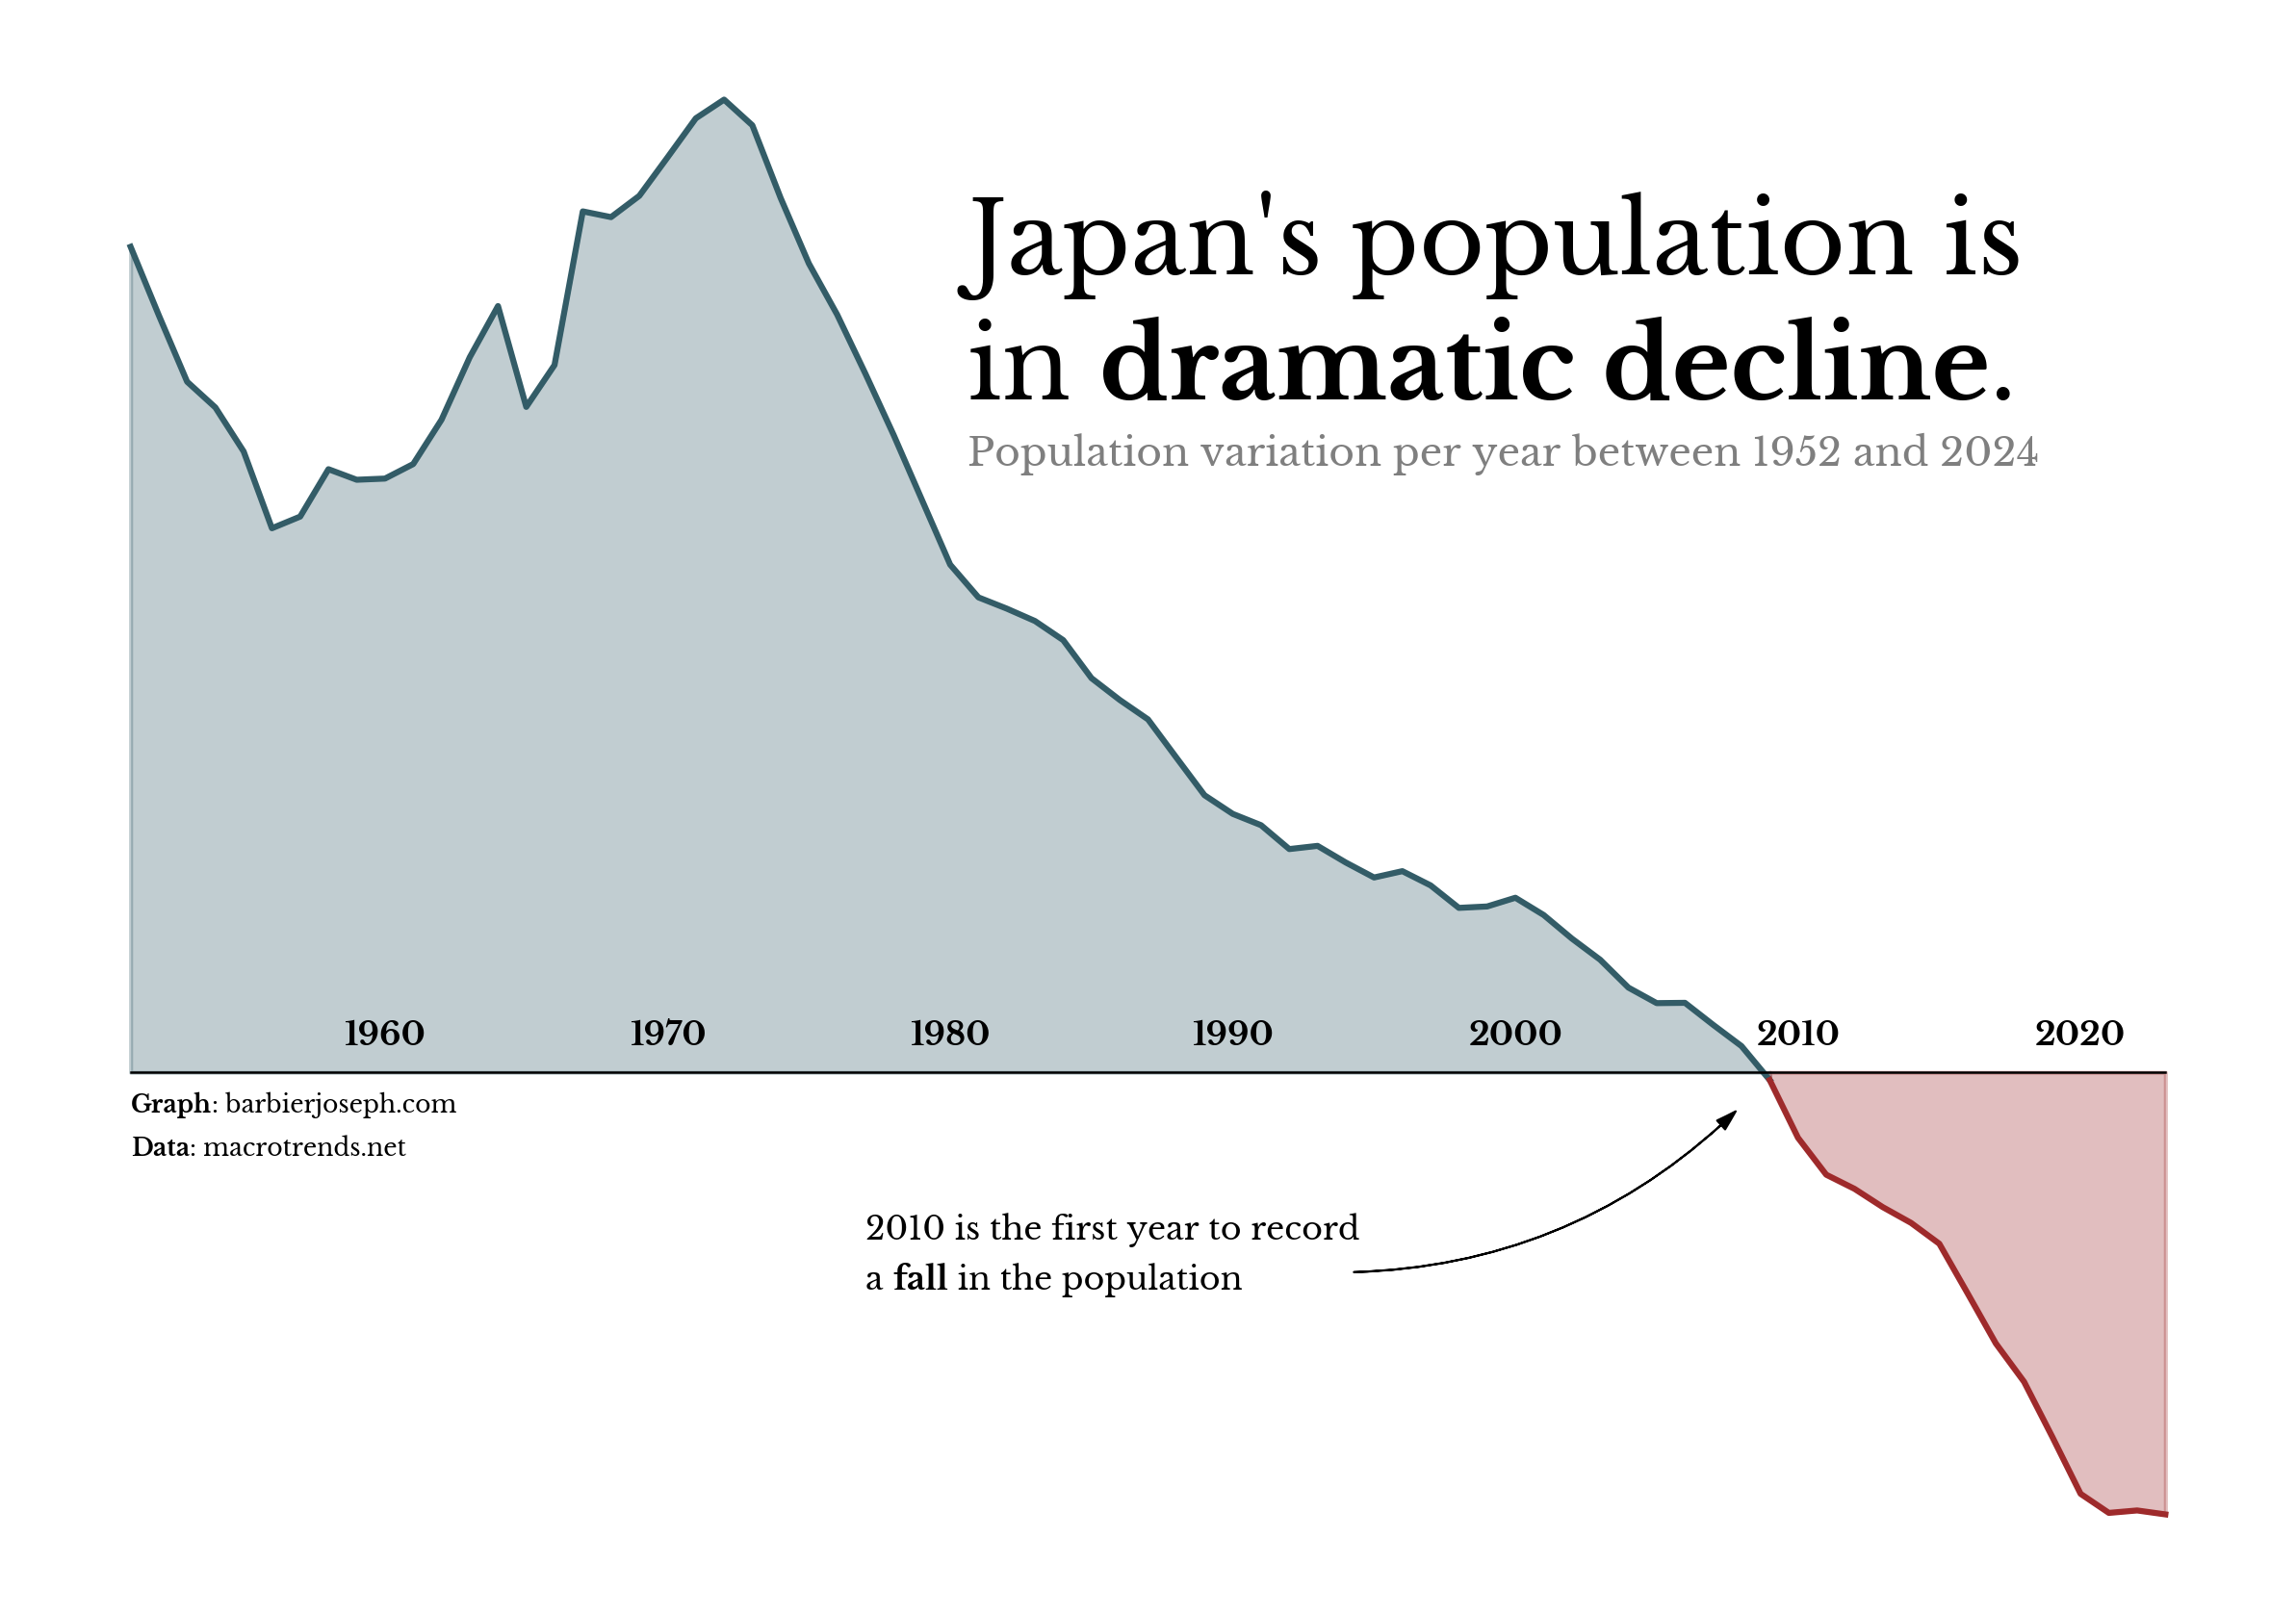

In [85]:
# style parameters
font = load_font(
   'https://github.com/impallari/Libre-Baskerville/blob/master/LibreBaskerville-Regular.ttf?raw=true'
)
boldfont = load_font(
   'https://github.com/impallari/Libre-Baskerville/blob/master/LibreBaskerville-Bold.ttf?raw=true'
)
arrow_props = dict(color='black', tail_width=0.05, linewidth=0.5, head_width=3, head_length=5, radius=0.2)

fig, ax = plt.subplots(dpi=300, figsize=(10,7))
ax.set_axis_off()

# before
color = '#335c67'
year_index = df[df['flag']].date.values[0]
before_df = df[df['date']<=year_index]
ax.plot(before_df['date'], before_df['pop_var'], color=color)
ax.fill_between(before_df['date'], before_df['pop_var'], alpha=0.3, color=color)

# after
color = '#9e2a2b'
after_df = df[df['date']>=year_index]
ax.plot(after_df['date'], after_df['pop_var'], color=color)
ax.fill_between(after_df['date'], after_df['pop_var'], alpha=0.3, color=color)

ax.plot([1952, 2024], [0,0], color='black', linewidth=0.6)
year_range = range(1960, 2021, 10)
for year in year_range:
   ax.text(x=year+1, y=40000, s=f'{year}', font=boldfont, size=8, ha='center')

s = "Japan's population is\nin <dramatic decline>."
fig_text(x=0.45, y=0.8, s=s, font=font, highlight_textprops=[{'font':boldfont}], fontsize=25, ha='left', va='top')

s = "Population variation per year between 1952 and 2024"
fig_text(x=0.45, y=0.68, s=s, font=font, fontsize=9.8, ha='left', va='top', alpha=0.5)

s = "<Graph>: barbierjoseph.com\n<Data>: macrotrends.net"
ax_text(x=1952, y=-30000, s=s, font=font, fontsize=6, ha='left', highlight_textprops=[{'font':boldfont}]*2)

s = "2010 is the first year to record\na <fall> in the population"
ax_text(x=1978, y=-210000, s=s, font=font, fontsize=8, ha='left', highlight_textprops=[{'font':boldfont}])
ax_arrow(tail_position=(1995, -300000), head_position=(2009, -50000), ax=ax, **arrow_props)

plt.savefig('japan-population.png', dpi=300)
plt.show()